# Scikit-learn

In [21]:
# !pip install --upgrade scikit-learn
# !pip install matplotlib
!pip install pandas

  Using cached pandas-2.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached pandas-2.3.3-cp312-cp312-macosx_11_0_arm64.whl (10.7 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pandas]2m1/2 [pandas]


In [4]:
from sklearn.datasets import fetch_california_housing

In [27]:
print(fetch_california_housing()['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
X, y = fetch_california_housing(return_X_y=True)

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
import pandas as pd

In [18]:
# mod = LinearRegression()
# mod = KNeighborsRegressor().fit(X, y)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor(n_neighbors=1))
])
# pipe.get_params()

In [25]:
mod = GridSearchCV(estimator=pipe,
                   param_grid={'model__n_neighbors': range(1, 11)},
                   cv=3)

In [26]:
mod.fit(X, y)
pd.DataFrame(mod.cv_results_)
# pipe.fit(X, y)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003931,0.001351,0.074969,0.005279,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,10
1,0.003058,0.000050,0.083351,0.006707,2,{'model__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,9
2,0.003044,0.000130,0.089394,0.006667,3,{'model__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,8
3,0.003075,0.000042,0.094703,0.006365,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
4,0.003039,0.000062,0.098316,0.007053,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
5,0.003048,0.000069,0.102188,0.006696,6,{'model__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
6,0.002992,0.000107,0.105884,0.007456,7,{'model__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
7,0.003038,0.000021,0.109381,0.007454,8,{'model__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
8,0.003018,0.000023,0.111626,0.007711,9,{'model__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
9,0.003041,0.000034,0.114708,0.008062,10,{'model__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,1


In [28]:
# pred = pipe.predict(X)
pred = mod.predict(X)

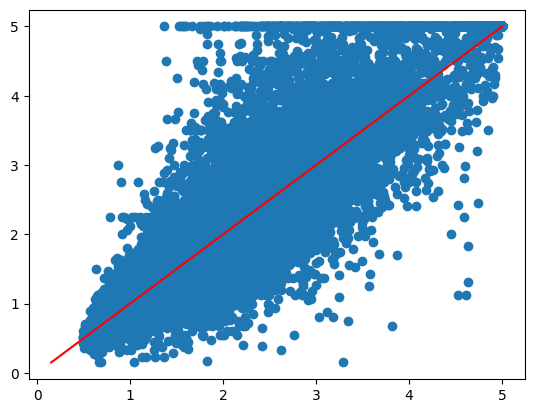

In [30]:
plt.scatter(pred, y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='red')